In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings("ignore")
data = pd.read_csv("../../dane.csv")

In [3]:
data.head(5)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
data = data.drop(["PassengerId", "Cabin", "Name"], axis=1)

In [5]:
data.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True


In [6]:
from sklearn import preprocessing

In [7]:
le = preprocessing.LabelEncoder()

In [8]:
change_to_numercial = ["CryoSleep", "HomePlanet", "VIP", "Transported", "Destination"]
cols = ["RoomService", "FoodCourt", "ShoppingMall",	"Spa", 	"VRDeck", 	"Transported", "CryoSleep", "Age", "VIP", "HomePlanet", "Destination"]
for info in change_to_numercial:
    data[info] = le.fit_transform(data[info])
# min-max normalization
def find_max_and_min(list):
    max = list[0]
    min = list[0]
    for x in list:
        if x > max:
            max = x
        if x < min:
            min = x
    return [max, min]
for x in cols:
    values = find_max_and_min(data[x])
    
    for y, z in enumerate(data[x]):
        # data[x][y] = (z - data[x].mean()) / data[x].std()
        data[x][y] = z / values[0]
#             data[x][y] = (z - values[1]) / (values[0] - values[1])
    

In [9]:
data.head(5)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,0.333333,0.0,0.666667,0.493671,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0
1,0.000000,0.0,0.666667,0.303797,0.0,0.007608,0.000302,0.001064,0.024500,0.001823,1
2,0.333333,0.0,0.666667,0.734177,0.5,0.003001,0.119948,0.000000,0.299670,0.002030,0
3,0.333333,0.0,0.666667,0.417722,0.0,0.000000,0.043035,0.015793,0.148563,0.007997,0
4,0.000000,0.0,0.666667,0.202532,0.0,0.021149,0.002348,0.006428,0.025214,0.000083,1


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [11]:

cols = ["RoomService", "FoodCourt", "ShoppingMall",	"Spa", 	"VRDeck", 	"Transported", "CryoSleep", "Age", "VIP", "HomePlanet", "Destination"]
for col in cols:
    data[col].fillna(data[col].median(), inplace=True) 
Y = data["Transported"]
X = data.drop("Transported", axis=1)
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2)


In [12]:
model = LogisticRegression(max_iter=1000).fit(X_train, Y_train)

In [13]:
predictions = model.predict(X_val)
from sklearn.metrics import accuracy_score
print(f"accuracy of my project is {accuracy_score(Y_val, predictions)}")


accuracy of my project is 0.7630822311673375


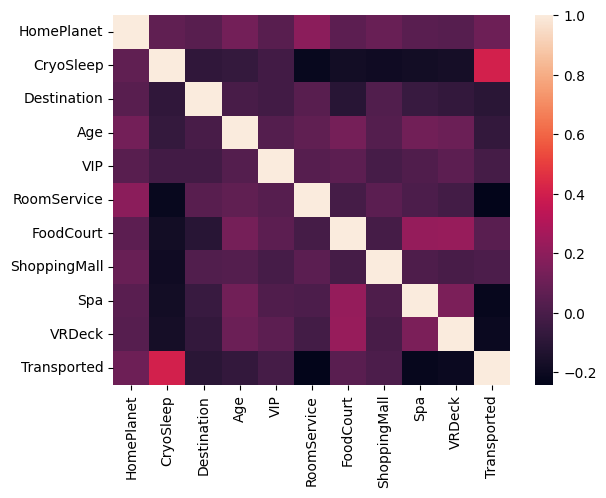

In [14]:
sns.heatmap(data.corr())
plt.show()

Okay, so I have developed a model that can predict whether a person was transported or not with an accuracy of approximately 76%.

Now, I will discuss interesting correlations in my data.

According to the graph at the top of the page, I have identified the following relationships:

- People who used CryoSleep were more likely to be transported.
- The less money a person spent on VRDeck, Spa, and RoomService, the greater the chance that they were transported.


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8693 non-null   float64
 1   CryoSleep     8693 non-null   float64
 2   Destination   8693 non-null   float64
 3   Age           8693 non-null   float64
 4   VIP           8693 non-null   float64
 5   RoomService   8693 non-null   float64
 6   FoodCourt     8693 non-null   float64
 7   ShoppingMall  8693 non-null   float64
 8   Spa           8693 non-null   float64
 9   VRDeck        8693 non-null   float64
 10  Transported   8693 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 747.2 KB
